In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import datetime 
from statsmodels.tsa.arima_model import ARIMA 

plt.style.use("fivethirtyeight")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [33]:
df = pd.read_csv('TSLA-2.csv')
df.head()
df = df.loc[:,['Date','Close']]

In [5]:
df.head()

,Date,Close
0,2020-01-02,86.052002
1,2020-01-03,88.601997
2,2020-01-06,90.307999
3,2020-01-07,93.811996
4,2020-01-08,98.428001


In [6]:
df.tail()

,Date,Close
510,2022-01-10,1058.119995
511,2022-01-11,1064.400024
512,2022-01-12,1106.219971
513,2022-01-13,1031.560059
514,2022-01-14,1049.609985


In [8]:
#plot the data 
train = df.loc[df['Date'] <= '2021-12-31']
test = df.loc[df['Date'] > '2021-12-31']

test = test.set_index('Date')
test.index = pd.to_datetime(test.index)
test.head()

,Close
Date,
2022-01-03,1199.780029
2022-01-04,1149.589966
2022-01-05,1088.119995
2022-01-06,1064.699951
2022-01-07,1026.959961


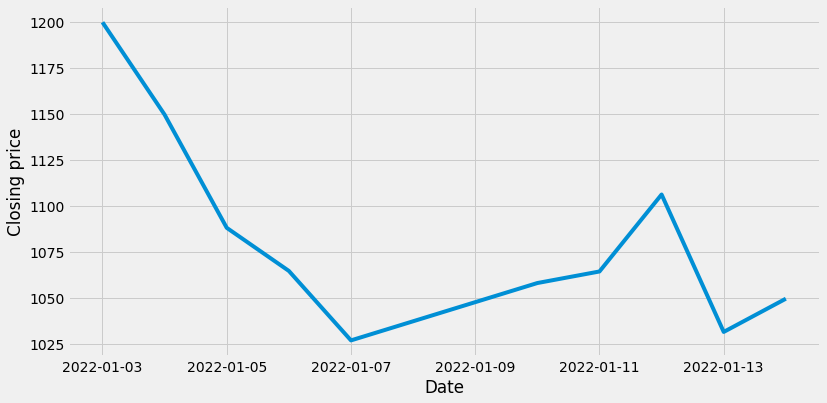

In [9]:
#plotting
plt.figure(figsize=(12,6))
plt.plot(test['Close'],label = 'Price')
plt.xlabel('Date')
plt.ylabel("Closing price")
plt.show()

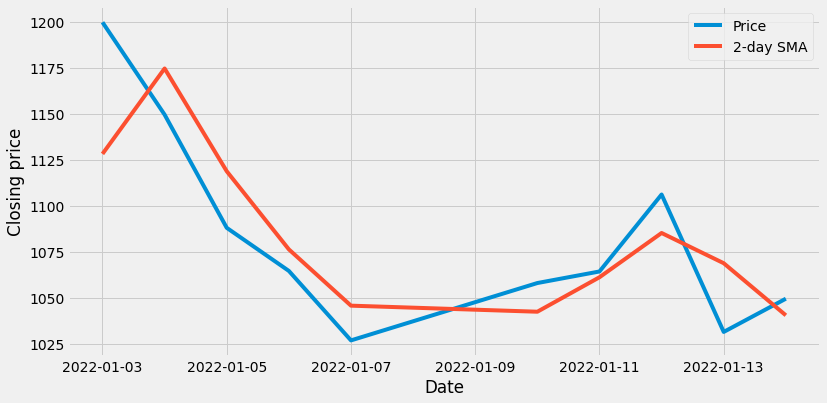

In [34]:
#Simple Moving Average 
sma10 = df['Close'].rolling(2).mean()

df['2-day SMA'] = np.round(sma10,decimals=3)
train = df.loc[df['Date'] <= '2021-12-31']
test = df.loc[df['Date'] > '2021-12-31']

test = test.set_index('Date')
test.index = pd.to_datetime(test.index)

#plotting
plt.figure(figsize=(12,6))
plt.plot(test['Close'],label = 'Price')
plt.plot(test['2-day SMA'],label = '2-day SMA')
plt.xlabel('Date')
plt.ylabel("Closing price")
plt.legend()
plt.show()

,Date,Close,2-day SMA
0,2020-01-02,86.052002,NaN
1,2020-01-03,88.601997,87.327
2,2020-01-06,90.307999,89.455
3,2020-01-07,93.811996,92.060
4,2020-01-08,98.428001,96.120
...,...,...,...
510,2022-01-10,1058.119995,1042.540
511,2022-01-11,1064.400024,1061.260
512,2022-01-12,1106.219971,1085.310
513,2022-01-13,1031.560059,1068.890


In [14]:
#replace the real values from 03-01-2022 with the SMA and make recurrsive SMAs
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(ytrue, ypred)

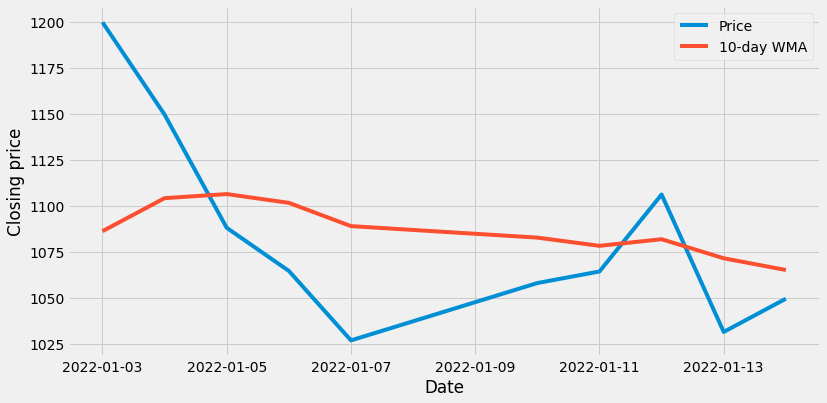

In [37]:
#Weight moving average method 
weights = np.arange(1,11)
wma10 = df['Close'].rolling(10).apply(lambda price: np.dot(price,weights)/weights.sum(),raw = True)

df['10-day WMA'] = np.round(wma10,decimals=3)
train = df.loc[df['Date'] <= '2021-12-31']
test = df.loc[df['Date'] > '2021-12-31']

test = test.set_index('Date')
test.index = pd.to_datetime(test.index)

#plotting
plt.figure(figsize=(12,6))
plt.plot(test['Close'],label = 'Price')
plt.plot(test['10-day WMA'],label = '10-day WMA')
plt.xlabel('Date')
plt.ylabel("Closing price")
plt.legend()
plt.show()



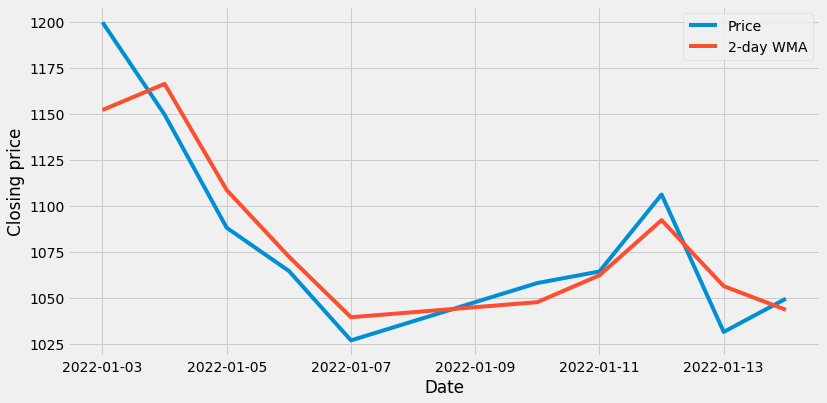

In [38]:
#Weight moving average method 
weights = np.arange(1,3)
wma2 = df['Close'].rolling(2).apply(lambda price: np.dot(price,weights)/weights.sum(),raw = True)

df['2-day WMA'] = np.round(wma2,decimals=3)
train = df.loc[df['Date'] <= '2021-12-31']
test = df.loc[df['Date'] > '2021-12-31']

test = test.set_index('Date')
test.index = pd.to_datetime(test.index)

#plotting
plt.figure(figsize=(12,6))
plt.plot(test['Close'],label = 'Price')
plt.plot(test['2-day WMA'],label = '2-day WMA')
plt.xlabel('Date')
plt.ylabel("Closing price")
plt.legend()
plt.show()

In [39]:
df.head()

,Date,Close,2-day SMA,10-day WMA,2-day WMA
0,2020-01-02,86.052002,NaN,NaN,NaN
1,2020-01-03,88.601997,87.327,NaN,87.752
2,2020-01-06,90.307999,89.455,NaN,89.739
3,2020-01-07,93.811996,92.060,NaN,92.644
4,2020-01-08,98.428001,96.120,NaN,96.889


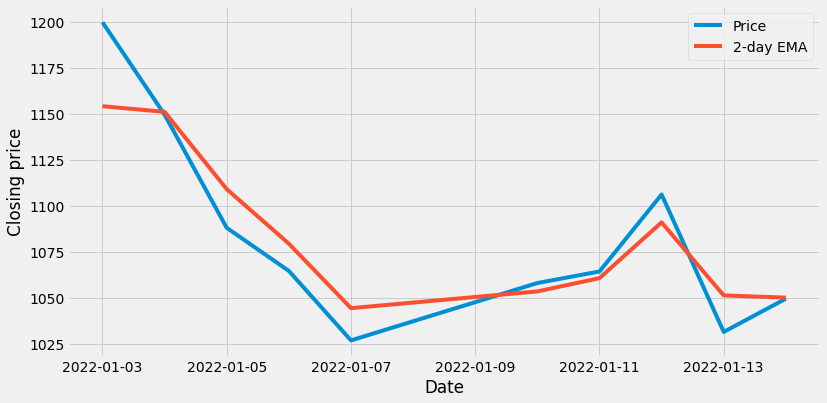

In [41]:
#Exponential Moving AVerage 
ema2 = df['Close'].ewm(span= 2,adjust = False).mean()

df['2-day EMA'] = np.round(ema2,decimals=3)
train = df.loc[df['Date'] <= '2021-12-31']
test = df.loc[df['Date'] > '2021-12-31']

test = test.set_index('Date')
test.index = pd.to_datetime(test.index)

#plotting
plt.figure(figsize=(12,6))
plt.plot(test['Close'],label = 'Price')
plt.plot(test['2-day EMA'],label = '2-day EMA')
plt.xlabel('Date')
plt.ylabel("Closing price")
plt.legend()
plt.show()

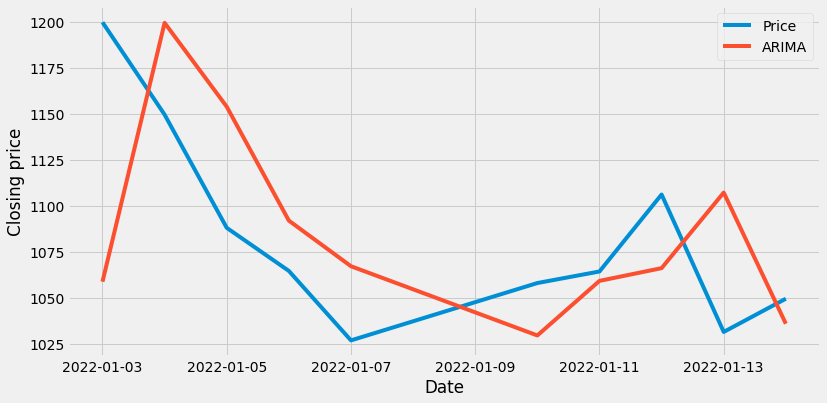

In [43]:
#ARIMA - Predict how will be my model performance for one-day 
from statsmodels.tsa.arima_model import ARIMA 


X = df['Close'].values 
size = np.sum(df['Date']<='2021-12-31')
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
  model = ARIMA(history, order = (1,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)

  #append yhat - history to find the actual performance for ndays
  obs = test[t]
  history.append(obs)

test = df.loc[df['Date'] > '2021-12-31']

test = test.set_index('Date')
test.index = pd.to_datetime(test.index)
test.loc[:,'ARIMA'] = predictions

plt.figure(figsize=(12,6))
plt.plot(test['Close'],label = 'Price')
plt.plot(test['ARIMA'],label = 'ARIMA')
plt.xlabel('Date')
plt.ylabel("Closing price")
plt.legend()
plt.show()
#[01-01-2020 - 31-12-2021] -> History -> [03-01-2022](yhat) [03-01-2022](real)
#[01-01-2020 - 03-01-2022] -> History -> [04-01-2022](yhat) [04-01-2022](real)
#[01-01-2020 - 04-01-2022] -> History -> [05-01-2022]

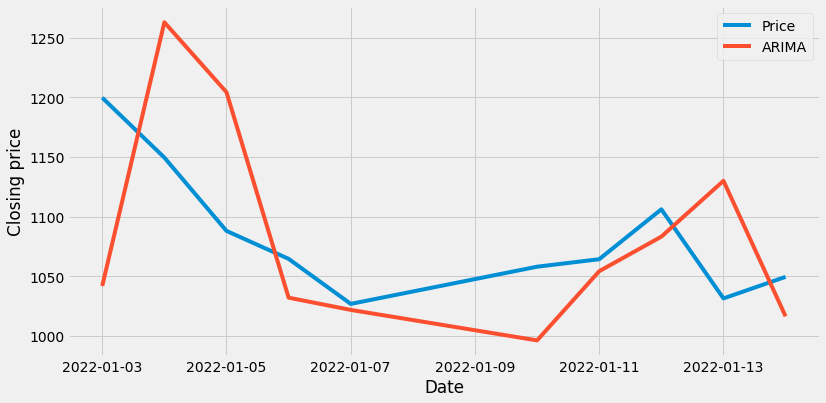

In [46]:
#ARIMA - Predict how will be my model performance for one-day 
from statsmodels.tsa.arima_model import ARIMA 


X = df['Close'].values 
size = np.sum(df['Date']<='2021-12-31')
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
  #P - AR, D - differentiation degress, Q - MA (order)
  model = ARIMA(history, order = (1,2,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)

  #append yhat - history to find the actual performance for ndays
  obs = test[t]
  history.append(obs)

test = df.loc[df['Date'] > '2021-12-31']

test = test.set_index('Date')
test.index = pd.to_datetime(test.index)
test.loc[:,'ARIMA'] = predictions

plt.figure(figsize=(12,6))
plt.plot(test['Close'],label = 'Price')
plt.plot(test['ARIMA'],label = 'ARIMA')
plt.xlabel('Date')
plt.ylabel("Closing price")
plt.legend()
plt.show()
#[01-01-2020 - 31-12-2021] -> History -> [03-01-2022](yhat) [03-01-2022](real)
#[01-01-2020 - 03-01-2022] -> History -> [04-01-2022](yhat) [04-01-2022](real)
#[01-01-2020 - 04-01-2022] -> History -> [05-01-2022]

In [47]:
!pip install fbprophet 
from fbprophet import Prophet

In [50]:
size = np.sum(df['Date']<='2021-12-31')
inter_df = df.iloc[:size,:]
inter_df = inter_df.rename(columns = {'Date':'ds','Close':'y'})

m = Prophet(daily_seasonality=True)
m.fit(inter_df)
future = m.make_future_dataframe(periods = 15,freq = 'D')
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [51]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,87.358320,12.769375,172.071544,87.358320,87.358320,6.144602,6.144602,6.144602,6.463844,6.463844,6.463844,-0.319243,-0.319243,-0.319243,0.0,0.0,0.0,93.502921
1,2020-01-03,87.865895,14.239680,175.089017,87.865895,87.865895,6.437621,6.437621,6.437621,6.463844,6.463844,6.463844,-0.026224,-0.026224,-0.026224,0.0,0.0,0.0,94.303515
2,2020-01-06,89.388619,13.673531,169.779162,89.388619,89.388619,6.433318,6.433318,6.433318,6.463844,6.463844,6.463844,-0.030526,-0.030526,-0.030526,0.0,0.0,0.0,95.821938
3,2020-01-07,89.896194,19.984821,172.016872,89.896194,89.896194,7.015696,7.015696,7.015696,6.463844,6.463844,6.463844,0.551852,0.551852,0.551852,0.0,0.0,0.0,96.911890
4,2020-01-08,90.403769,13.798948,179.437150,90.403769,90.403769,7.903947,7.903947,7.903947,6.463844,6.463844,6.463844,1.440102,1.440102,1.440102,0.0,0.0,0.0,98.307716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,2022-01-11,1146.742186,1067.118262,1234.457849,1145.832998,1147.599679,7.015696,7.015696,7.015696,6.463844,6.463844,6.463844,0.551852,0.551852,0.551852,0.0,0.0,0.0,1153.757882
516,2022-01-12,1149.718013,1073.971787,1237.159054,1148.534823,1150.829761,7.903947,7.903947,7.903947,6.463844,6.463844,6.463844,1.440102,1.440102,1.440102,0.0,0.0,0.0,1157.621960
517,2022-01-13,1152.693840,1075.169834,1241.155069,1151.278882,1154.102786,6.144602,6.144602,6.144602,6.463844,6.463844,6.463844,-0.319243,-0.319243,-0.319243,0.0,0.0,0.0,1158.838442
518,2022-01-14,1155.669668,1084.883976,1244.562098,1153.963566,1157.348698,6.437621,6.437621,6.437621,6.463844,6.463844,6.463844,-0.026224,-0.026224,-0.026224,0.0,0.0,0.0,1162.107288


In [ ]:
1 4 
2 5 
3 ?  (5*2+4*1)/3

In [ ]:
[16-08-2021] - Close1
[17-08-2021] - Close2
Close3 - 18th = Close1 + Close2 /2 
